# **Aerofit - Descriptive Statistics & Probability**

### **About :**

**Aerofit** is a leading brand in the field of **fitness equipment**. Aerofit provides a product range including machines such as **treadmills, exercise bikes, gym equipment, and fitness** accessories to cater to the needs of all categories of people.

#### **Business Problem:**

The market research team at **AeroFit** wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform **descriptive analytics** **to create a customer profile** for each AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct **two-way contingency tables** and compute all **conditional and marginal probabilities** along with their insights/impact on the business.

The **objective** is to **identify and profile the target audience** for each treadmill product by examining customer attributes such as age, gender, income level, fitness usage patterns, and other relevant characteristics.

**The insights** generated from this study will enable AeroFit to:

* Better understand the preferences of different customer segments.

* Align marketing strategies and promotional efforts with the right audience.

* Provide more accurate and personalized treadmill recommendations to new customers.

* Ultimately, enhance customer satisfaction and increase sales conversions.

In [ ]:
## upload the data into the colab from google drive

!gdown 1_I_vgf0hQyQivo1TvETDIgG9FEHCrLj8

Downloading...
From: https://drive.google.com/uc?id=1_I_vgf0hQyQivo1TvETDIgG9FEHCrLj8
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 18.8MB/s]


In [ ]:
## import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## load the data into dataframe

df = pd.read_csv('aerofit_treadmill.csv')

#### Basic Data Info

In [ ]:
# dimension of the data
df.ndim

2

In [ ]:
# shape of the data
df.shape

(180, 9)

In [ ]:
#-- total rows in the dataset
print('Total Rows are : ', df.shape[0])
print('Total Columns are : ', df.shape[1])

Total Rows are :  180
Total Columns are :  9


The **Aerofit** Dataset consists of *2 dimensions* i.e. collections of 1D arrays and total rows in the dataset are **180** and total columns are **9**.

In [ ]:
# sample of the data : top 5 records

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


The company collected the data on individuals who purchased a treadmill from the **AeroFit** stores during the prior three months. The dataset has the following features:

* **Product Purchased:**	KP281, KP481, or KP781
* **Age:**	In years
* **Gender:**	Male/Female
* **Education:**	In years
* **MaritalStatus:**	Single or partnered
* **Usage:**	The average number of times the customer plans to use the treadmill each week.
* **Income:**	Annual income (in $)
* **Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles:**	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

The **KP281** is an entry-level treadmill that sells for **$1,500.**

The **KP481** is for mid-level runners that sell for **$1,750.**

The **KP781** treadmill is having advanced features that sell for **$2,500.**

In [ ]:
# find the data type of all variable and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product , Gender and Marital Status are objective type , expect them all are int data type

In [ ]:
#statistical measures

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Total number of rows are 180 .

- The age range of most individuals here is between 18 and 50, with a **concentration around the age of 28**.

- Most people have 14-16 years of education - typical of **college-level** education where people are also there who have been completed their college level as well.

- Usage treadmill is around 2 to 7 average time per week.

- Most people rated themselves average to good in fitness **(most of them rating - 3.5)**

- Most of them **Income** is near **approx 53k** and the people income lie under the range of 29k to 100k.

- There is a significant gap between the mean and median in the Miles column, which suggests the presence of **outliers**.

**Result :**
**Young, college-educated** group with **moderate incomes** and **average fitness.** Mile data consists of **Outliers**.



In [ ]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
lst = np.array(['Product', 'MaritalStatus', 'Gender'])
{col: df[col].unique() for col in lst}

{np.str_('Product'): array(['KP281', 'KP481', 'KP781'], dtype=object),
 np.str_('MaritalStatus'): array(['Single', 'Partnered'], dtype=object),
 np.str_('Gender'): array(['Male', 'Female'], dtype=object)}

* **AeroFit** has **3 treadmill products** (KP281, KP481, KP781).
* **Customers** differ in **age** **(32 groups), income (62 levels), usage (6 levels), fitness rating (5), and miles (37),** while categorical variables show **Gender (Male/Female), Marital Status (Single/Partnered), and Education (8 levels).**

/tmp/ipython-input-3678589170.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MaritalStatus', data=df, width=0.4,  palette="dark")
/tmp/ipython-input-3678589170.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=['#9df9ef', '#ffa8B6'], width=0.4, edgecolor='black', linewidth=1.5)


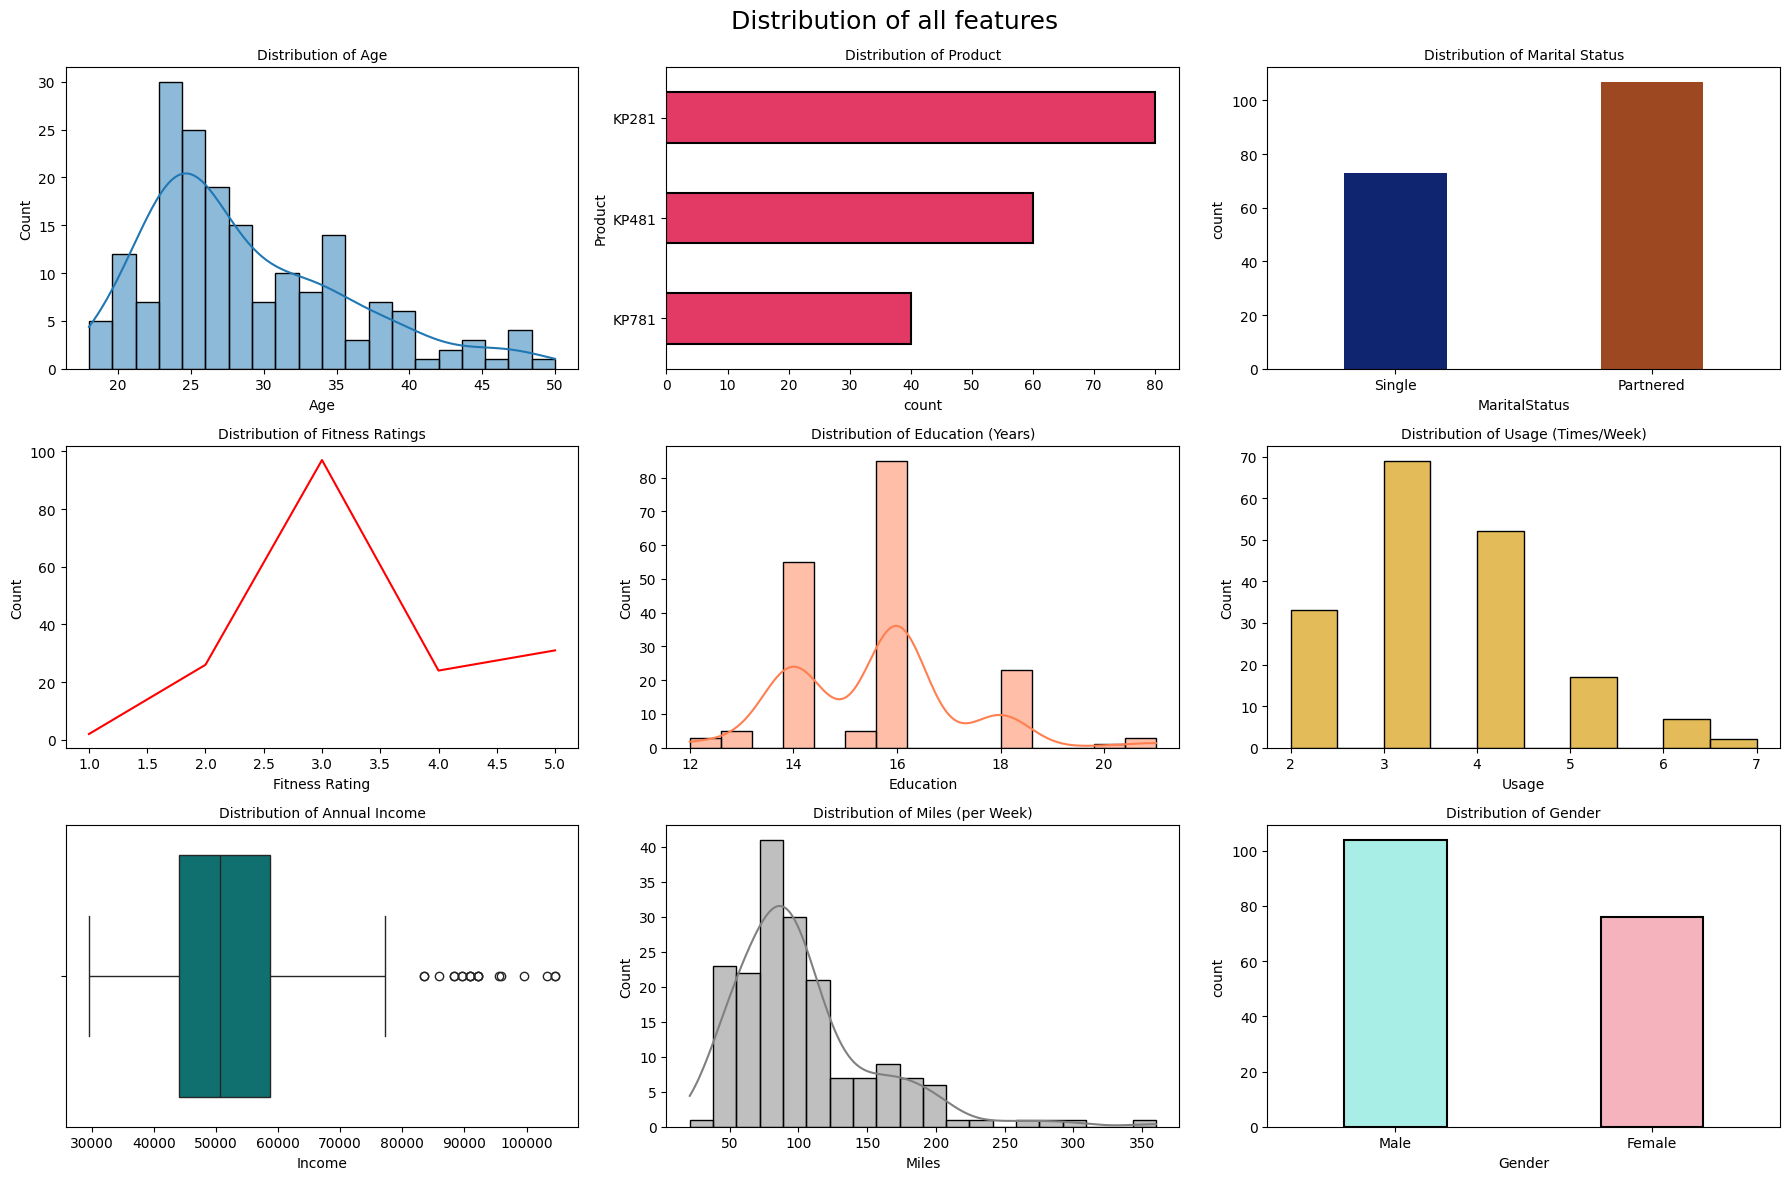

In [ ]:
# Distribution of all feature / columns

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
sns.histplot(data=df['Age'], bins=20, kde=True)
plt.title("Distribution of Age", fontsize=10)

plt.subplot(3, 3, 2)
sns.countplot(df['Product'], color ='#ff1d58', width=0.5, edgecolor='black', linewidth=1.5)
plt.title("Distribution of Product", fontsize=10)

plt.subplot(3, 3, 3)
sns.countplot(x='MaritalStatus', data=df, width=0.4,  palette="dark")
plt.title("Distribution of Marital Status", fontsize=10)

plt.subplot(3, 3, 4)
fitness_counts = df['Fitness'].value_counts().sort_index()
sns.lineplot(x=fitness_counts.index, y=fitness_counts.values, color='red')
plt.xlabel("Fitness Rating")
plt.ylabel("Count")
plt.title("Distribution of Fitness Ratings", fontsize=10)


plt.subplot(3, 3, 5)
sns.histplot(df['Education'], bins=15, kde=True, color="coral")
plt.title("Distribution of Education (Years)", fontsize=10)

plt.subplot(3, 3, 6)
sns.histplot(df['Usage'], bins=10, kde=False, color="goldenrod")
plt.title("Distribution of Usage (Times/Week)", fontsize=10)

plt.subplot(3, 3, 7)
sns.boxplot(x=df['Income'], color="teal")
plt.title("Distribution of Annual Income", fontsize=10)

plt.subplot(3, 3, 8)
sns.histplot(df['Miles'], bins=20, kde=True, color="grey")
plt.title("Distribution of Miles (per Week)", fontsize=10)

plt.subplot(3, 3, 9)
sns.countplot(x='Gender', data=df, palette=['#9df9ef', '#ffa8B6'], width=0.4, edgecolor='black', linewidth=1.5)
plt.title("Distribution of Gender", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Distribution of all features", fontsize=18)
plt.savefig("Outliers_detection.png", dpi=300, bbox_inches="tight")

plt.show()

Observations of each features :    

* **Age:** Most customers fall between **20-35 years**, showing a young and fitness-oriented audience.

* **Product:** **KP281** has the **highest** sales, followed by KP481, while KP781 is the least preferred.

* **Marital Status:** Majority of customers are **partnered** rather than single.

* **Fitness Rating:** Most users rated their fitness level at **3** (average fitness), with fewer at extreme ends.

* **Education:** Concentrated around **14-16 years**, indicating a well-educated customer base.

* **Usage (Times/Week):** Customers typically use treadmills **3-4 times** per week, showing moderate commitment.

* **Income:** Most customers earn between **$40,000-$70,000**, with a few high-income outliers.

* **Miles per Week:** Customers usually run **50-150 miles** per week, with most concentrated near 75-100 miles.

* **Gender:** **Males** slightly dominate the customer base compared to females.

Overall, AeroFit's treadmills are mainly used by **young, educated, partnered males with moderate fitness levels, middle-class income, and regular workout routines.**

In [ ]:
#-- What is the probability that a randomly selected customer purchased KP281, KP481, or KP781?

probs = df['Product'].value_counts(normalize=True) * 100
probs.round(2)

,proportion
Product,
KP281,44.44
KP481,33.33
KP781,22.22


Most customers purchased **KP281**, followed by KP481, while KP781 is the least preferred.

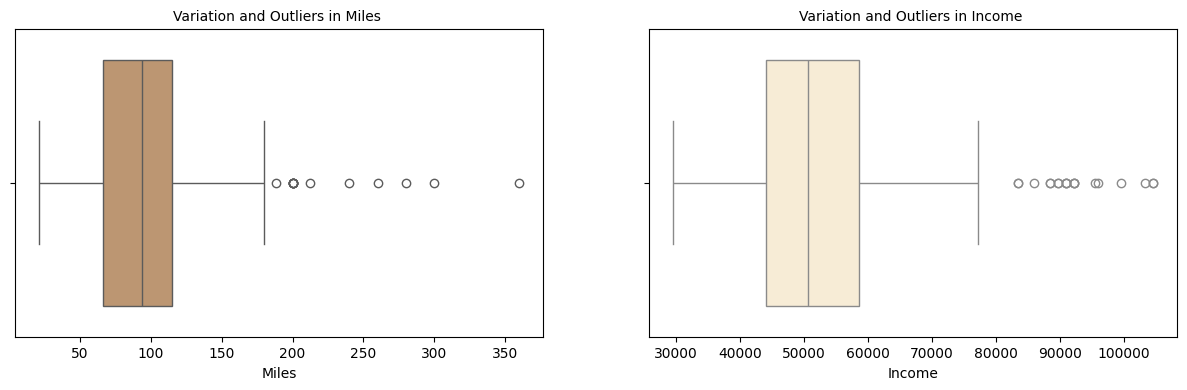

In [ ]:
# mean and median has much gap in Miles and Income , so to detect the outliers in them .
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Miles'],  color ='#c89666')
plt.title("Variation and Outliers in Miles ", fontsize=10)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income'],  color ='#fceed1')
plt.title("Variation and Outliers in Income ", fontsize=10)


plt.show()

* **Miles per Week:** Most customers run between 60-150 miles, but a few outliers go beyond **200-350 miles, indicating extreme usage patterns.**
* **Income:** Majority of customers earn 45,000-70,000, while several **high-income outliers exceed 80,000-100,000.**

This suggests **AeroFit has a core middle-income, moderate-usage customer base, with a small segment of high-income and heavy-usage outliers** who may prefer premium models.

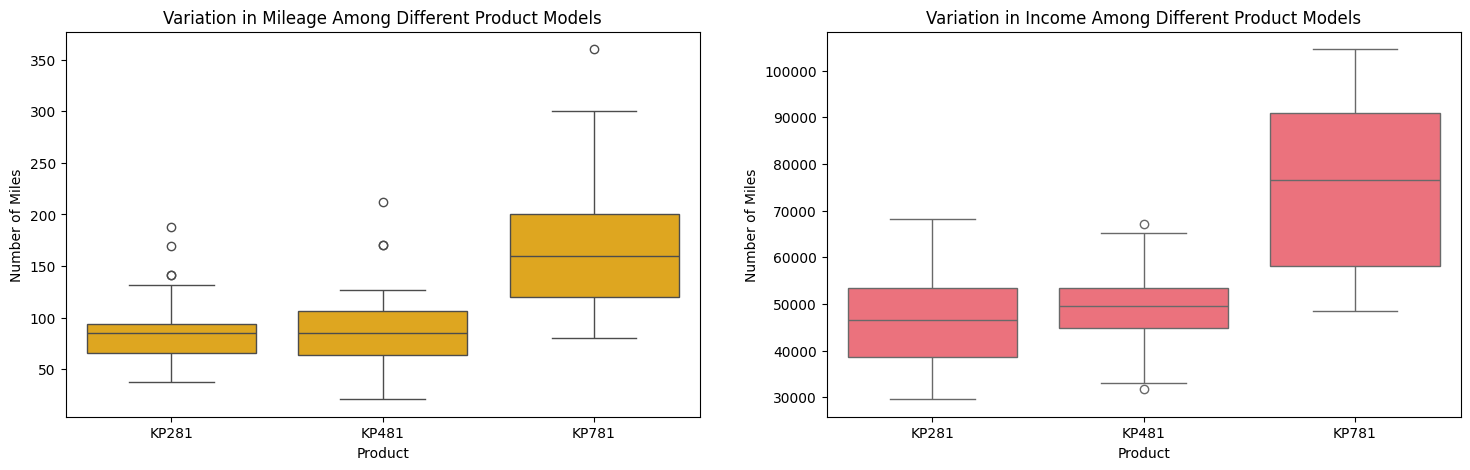

In [ ]:
# Variation Among Product Model
plt.figure(figsize = (18, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data =df , x = 'Product', y='Miles' , color ='#feb300')
plt.ylabel("Number of Miles")
plt.title("Variation in Mileage Among Different Product Models")

plt.subplot(1, 2, 2)
sns.boxplot(data =df , x = 'Product', y='Income' , color ='#ff5e6c')
plt.ylabel("Number of Miles")
plt.title("Variation in Income Among Different Product Models")


plt.show()



* **Mileage per week**  :  
  * For KP281, median is around 80 to 85, and some outliers are upto 180 miles.
  * For KP481, median is same as the KP281 , but outliers are beyound 120 and upto 200 miles . Range is slighter more than the KP281 as their product some users which represent extreme widely usage as their capability.
  * For KP781, median is around 160 and as it represents that this one is more efficient than others where users use this product more than usual others and its range is also wider which represent as it uses max to max 300 miles to 100 miles around. Large IQR and wider spread → performance varies a lot among customers.

* **Income**  :     
  * For KP281 , median income of the users are around 46k to 47k and spread of the user range varies from 30k to 67k.
  * For KP481 , median income of the users is around 48k and its variability is lower than the KP281. There are also the users , whose is more than usual which means more tha 68k but still bought the KP481 , and that range person have the capability to buy the another one .
  * For KP781 , higher class users used to bought this one , and its range varies wider than the others . Whose salary is near approx 78k , used to buy this one .



**At Short  :**    

In Miles :
* KP281 and KP481 are stable and consistent, good for reliability.
* KP781 is **high-performing** but variable, appealing to customers who want premium mileage, but may come with inconsistency.

In Income point of view :    
* KP281 and KP481: Mostly **mid-income buyers.**
* KP781: Strongly attracts **high-income buyers**, with greater spread.
* KP781: **Premium product - high mileage**, appeals to wealthy customers, but less consistent in performance.

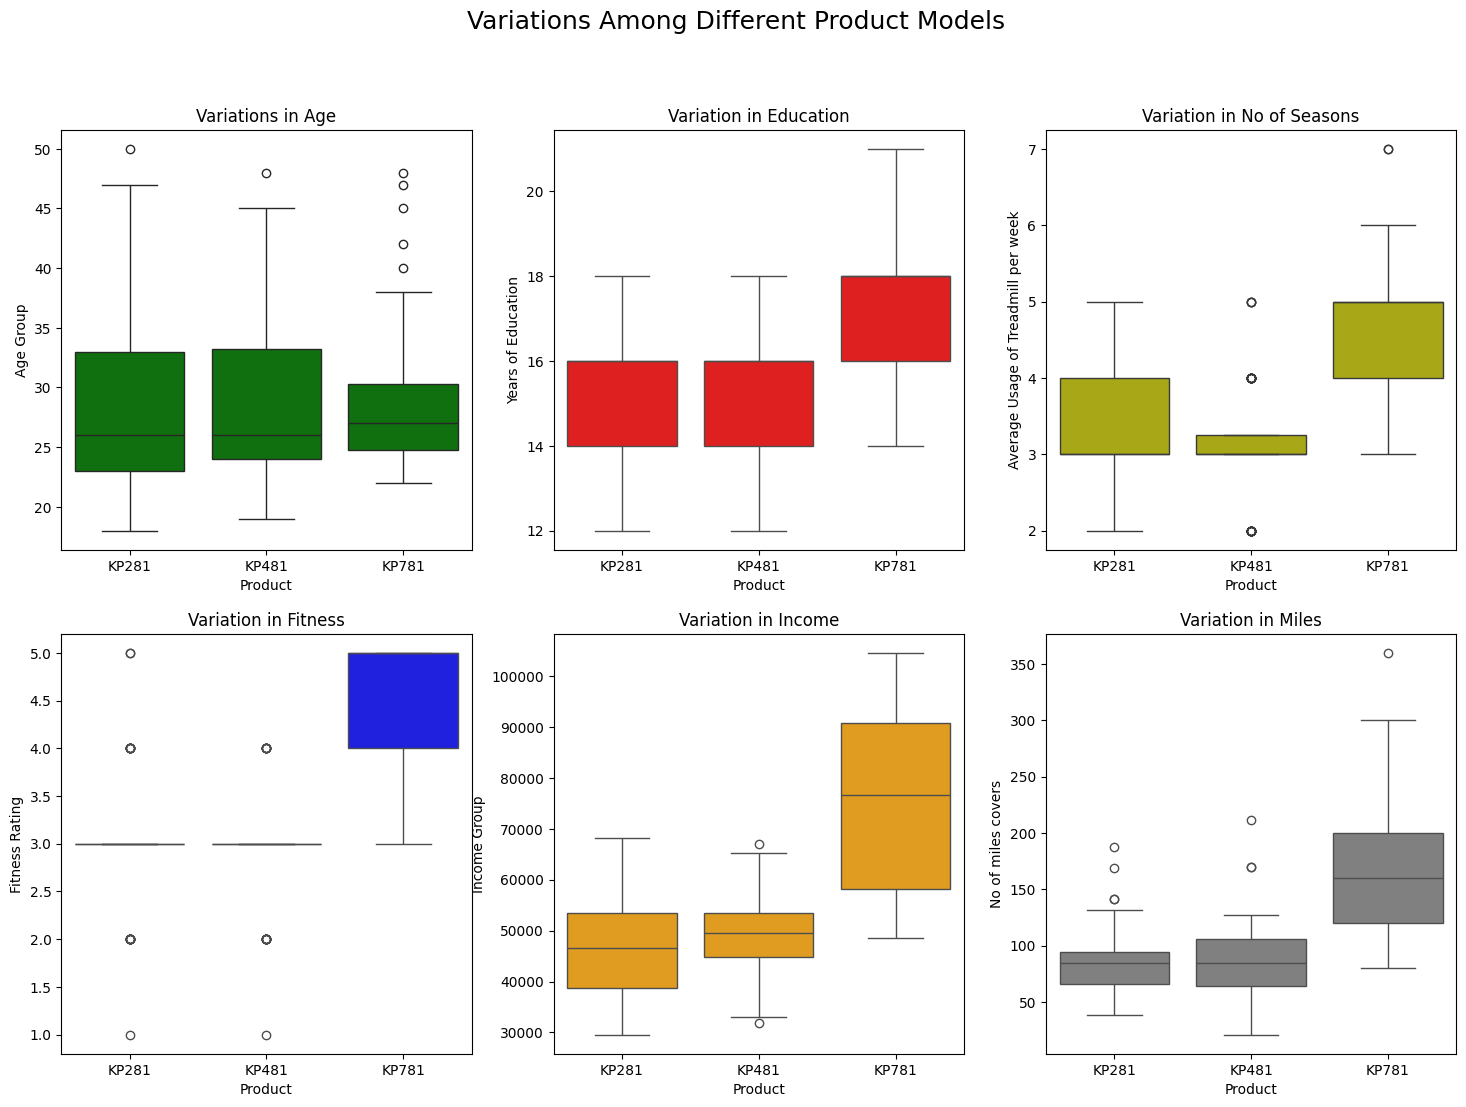

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="Product", y="Age", color ='g')
plt.ylabel("Age Group")
plt.title("Variations in Age")

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x="Product", y="Education", color = 'r')
plt.ylabel("Years of Education")
plt.title("Variation in Education")

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x="Product", y="Usage", color = 'y')
plt.ylabel("Average Usage of Treadmill per week")
plt.title("Variation in No of Seasons")

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x="Product", y="Fitness", color = 'b')
plt.ylabel("Fitness Rating")
plt.title("Variation in Fitness")

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x="Product", y="Income", color = 'orange')
plt.ylabel("Income Group")
plt.title("Variation in Income")

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x="Product", y="Miles", color = 'grey')
plt.ylabel("No of miles covers")
plt.title("Variation in Miles")

plt.suptitle("Variations Among Different Product Models", fontsize=18)
plt.savefig("Outliers_detection.png", dpi=300, bbox_inches="tight")

plt.show()

**1. Variations in Age**

* **KP281 & KP481:** Median age 25-26 years. Customer base mainly **young adults** to early 30s. Wider spread, with some older buyers (45-50).

* **KP781**: Median slightly higher (27-28 years). Less spread in **younger ages but some older buyers too** and that product is not for the older buyers.
* All models attract **mid-20s customers**, with KP281 & KP481 showing a slightly broader demographic spread.

**2. Variations in Education**

* **KP281 & KP481:** Median 15-16 years of education **(equivalent to college graduates).** Spread is moderate.

* **KP781**: Higher median (17 years), with a broader spread (up to 20+ years).
* **KP781** appeals **more to highly educated customers** (post-graduates, professionals).

**3. Seasons (Top-right: Usage frequency per week)**

* **KP281**: Median usage 3 times/week, moderate spread.

* **KP481**: Lowest variation, mostly clustered around 3.

* **KP781**: Median 4-5, higher spread, with heavy users reaching 7 times/week.

* **KP781** users are **more engaged and frequent users**; **KP481** users are **moderate and consistent.**

**4. Fitness Rating**

* **KP281 & KP481:** Median rating = 3 (average fitness), with outliers at both low and high extremes.

* **KP781**: Median rating = 4-5, showing significantly **fitter customers**.

* **KP781** is **strongly favored by fitter and more health-conscious individuals.**

**5. Variations in Income**

* **KP281 & KP481:** Median income 45,000-50,000. **Customer base = middle-income segment.**

* KP781: Median income much higher (75,000+), with spread extending beyond 100,000.
*  **KP781** is a premium product targeting **high-income customers**.

**6. Miles Covered**

* **KP281 & KP481:** Median 80-100 miles, consistent with **limited spread.**

* **KP781:** Median 160 miles, much higher, but with wide variability (up to 360+ miles).

* **KP781** delivers **superior mileage but with higher variation.**



In [ ]:
#-- What is the probability that a male customer purchased KP781?

round(pd.crosstab(df['Gender'], df['Product'], normalize='index').loc['Male','KP781']* 100, 2)

np.float64(31.73)

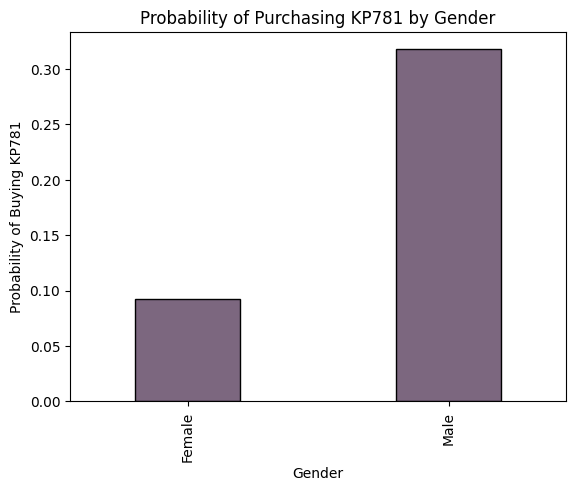

In [ ]:
prob_df = pd.crosstab(df['Gender'], df['Product'], normalize='index')

prob_df['KP781'].plot(kind='bar', color='#7c677f', width=0.4, edgecolor='black', linewidth=1)
plt.ylabel("Probability of Buying KP781")
plt.title("Probability of Purchasing KP781 by Gender")
plt.show()

* KP781 seems to more strongly dominant with the **male segment** of the market.
* Position KP781 as a performance-driven, high-tech treadmill model appealing to ambitious and fitness-focused men.
* For females, consider o**ffering bundled features, discounts, or customization options** to improve adoption.

In [ ]:
#-- What is the probability that a randomly selected customer is single?

round(df['MaritalStatus'].value_counts(normalize=True).loc['Single'] * 100, 2)

np.float64(40.56)

In [ ]:
#-- Given that a customer is single, what is the probability they purchased KP481?

round(pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index').loc['Single','KP481']*100, 2)

np.float64(32.88)

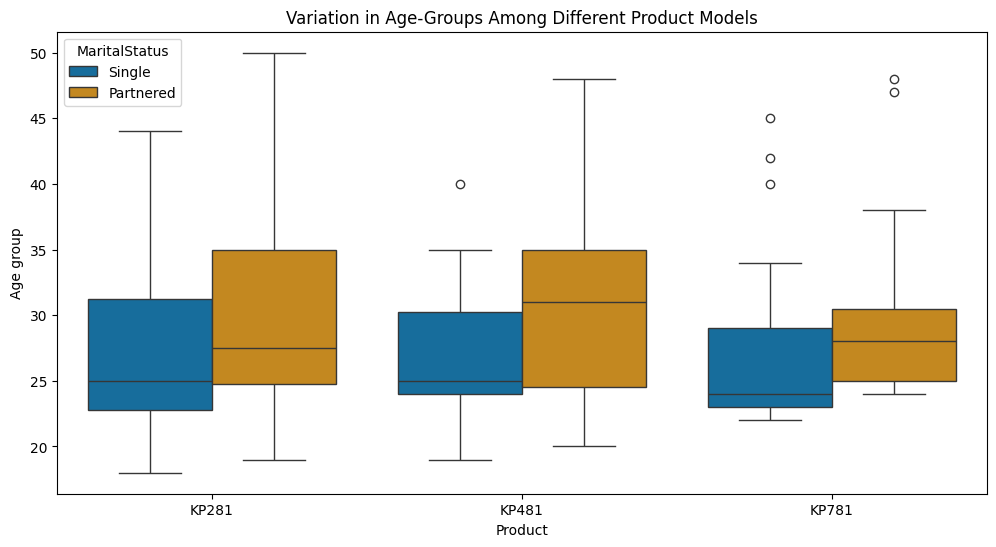

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x='Product', y='Age', hue='MaritalStatus', data=df,palette='colorblind')
plt.ylabel("Age group")
plt.title("Variation in Age-Groups Among Different Product Models")
plt.show()

Age distribution by product and marital status

* For KP281 , Singles are youngers while partners customers are older than usual .
* KP481 still also attracts the younger proportion of single.
* For KP781, Outliers show a few older individuals also buy it. Indicates KP781 appeals to both groups but partnered customers dominate in slightly older age brackets.

**Singles -** KP281 & KP481 (younger, budget-to-mid segment).

**Partnered -** KP781 (premium, older age groups).

In [ ]:
product_distribution = pd.crosstab(index=df['Product'], columns='count', normalize='columns') * 100
product_distribution.columns = ['Percentage']
product_distribution = product_distribution.round(2)
product_distribution

,Percentage
Product,
KP281,44.44
KP481,33.33
KP781,22.22


There is a **skew toward KP281,** which is significantly more common than the others. If you're aiming for balanced product distribution, you might need to increase representation of KP781 and KP481.

In [ ]:
#-- What is the probability that a customer runs more than 100 miles/week?

round((df['Miles'] >100).mean() * 100, 2)

np.float64(36.67)

Customer base is diverse in activity levels, with a significant minority of very active users.

In [ ]:
# -- Among married users, how many purchased KP281?

conditional_probs = pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index') * 100
conditional_probs = conditional_probs.round(2)

conditional_probs.reset_index().rename_axis(None, axis = 1)


,Product,Partnered,Single
0,KP281,60.0,40.0
1,KP481,60.0,40.0
2,KP781,57.5,42.5


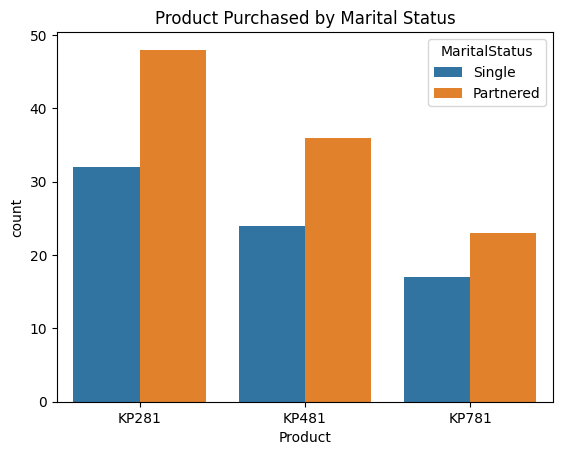

In [ ]:
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Product Purchased by Marital Status')
plt.show()

* **Partners customers** are **more dominant** to buy all type of Product.
* Marketing or campaigns targeting partnered customers may yield higher engagement and sales.

In [ ]:
#-- What is the probability that a customer is under 30 years old and purchased KP281?

df['Under30'] = df['Age'] < 30

round(pd.crosstab(df['Under30'], df['Product'], normalize='all').loc[True,'KP281']*100, 2)

np.float64(29.44)

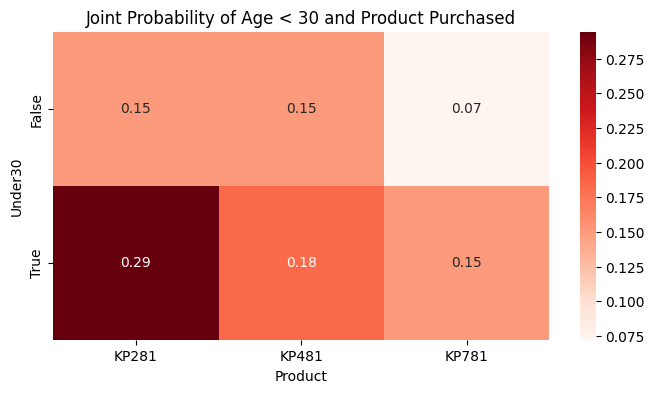

In [ ]:
ct = pd.crosstab(df['Under30'], df['Product'], normalize='all')

plt.figure(figsize=(8, 4))
sns.heatmap(ct, annot=True, cmap="Reds", fmt=".2f")
plt.title("Joint Probability of Age < 30 and Product Purchased")
plt.show()

* **29% of all customers are under 30 and purchased KP281,** which is the highest joint probability among all combinations.

* Customers under 30 show higher purchase proportions across all products compared to those aged 30+.

* Among older customers, the highest share is only 15% for KP281 and KP481 - much lower than their under-30 counterparts.

In [ ]:
# -- How does the age of customers differ for each treadmill type?
df.groupby('Product')['Age'].agg(['mean', 'median'])

,mean,median
Product,,
KP281,28.55,26.0
KP481,28.90,26.0
KP781,29.10,27.0


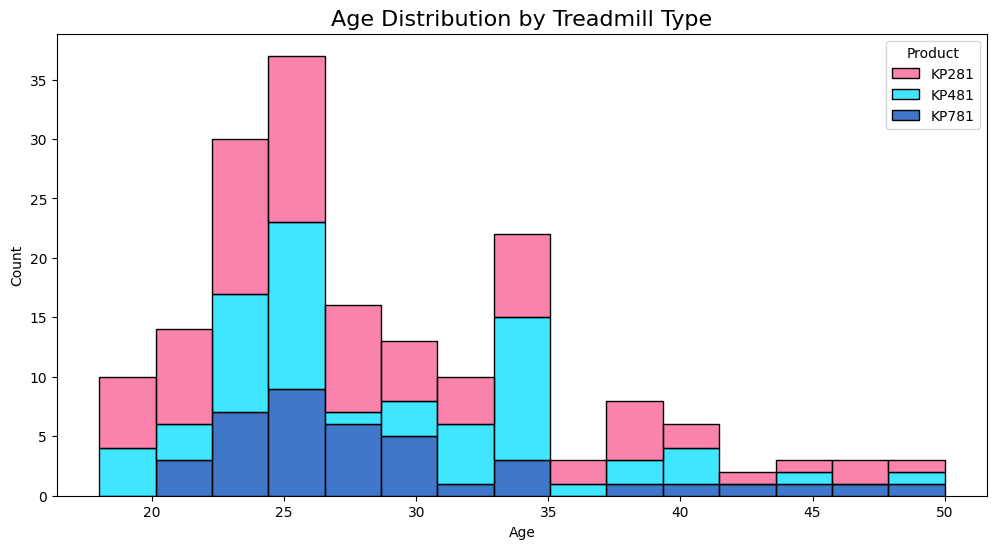

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Product',bins=15,  multiple='stack',   palette = ['#f75990', '#00DDFF', '#0049B7'] )
plt.title("Age Distribution by Treadmill Type", fontsize=16)
plt.show()

* Most buyers are in their **mid-to-late 20s,** regardless of the treadmill model.

* **KP281** has the **largest concentration of younger customers (20-28 age range)** — clearly visible from the taller pink bars on the left side of the histogram.

* KP781 has slightly **more buyers in their late 20s to early 30s,** and fewer very young users.

* The overall age range is broad (18 to 50), but the density is highest between 22-30 years for all models.

Since the median ages are quite close, product preference is not strongly age-segmented, but marketing could be tailored slightly (e.g. youthful themes for KP281 vs. performance/stability themes for KP781).

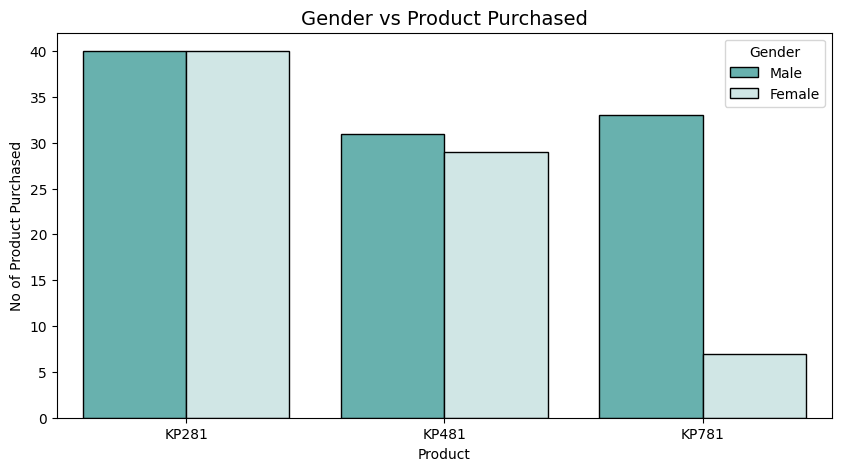

In [ ]:
# -- Is there a difference in treadmill choice between male and female customers?

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x = 'Product', hue='Gender', palette=['#5cbdb9', '#cceae8'], edgecolor='black', linewidth=1)
plt.ylabel('No of Product Purchased')
plt.title('Gender vs Product Purchased', fontsize=14)
plt.show()

* **Product KP281**

  * Both **male and female customers** purchased this treadmill in almost **equal** numbers (around 40 each).

  * This indicates no significant gender preference for KP281.

* **Product KP481**

  * Purchases are **slightly higher for males** compared to females (males 31, females 29).

  * The difference is small, so KP481 is fairly balanced but still slightly more popular among men.

* **Product KP781**

  * A strong difference appears here: Males (33 purchases), Females (7 purchases)

  * This treadmill seems to be **heavily preferred by male** customers compared to females.

* This suggests that treadmill preferences vary significantly by gender, with **KP781 showing the clearest gender bias.**

In [ ]:
#-- Given that a customer bought KP781, what is the probability they are male?
round(pd.crosstab(df['Product'], df['Gender'], normalize='index').loc['KP781', 'Male']*100, 2)


np.float64(82.5)

In [ ]:
# -- Do customers with higher years of education tend to purchase premium treadmills like KP781?

df.groupby('Product')['Education'].mean()

,Education
Product,
KP281,15.037500
KP481,15.116667
KP781,17.325000


/tmp/ipython-input-827914637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='Education', data=df, palette=['#006d77','#cc5500','#5a189a'])


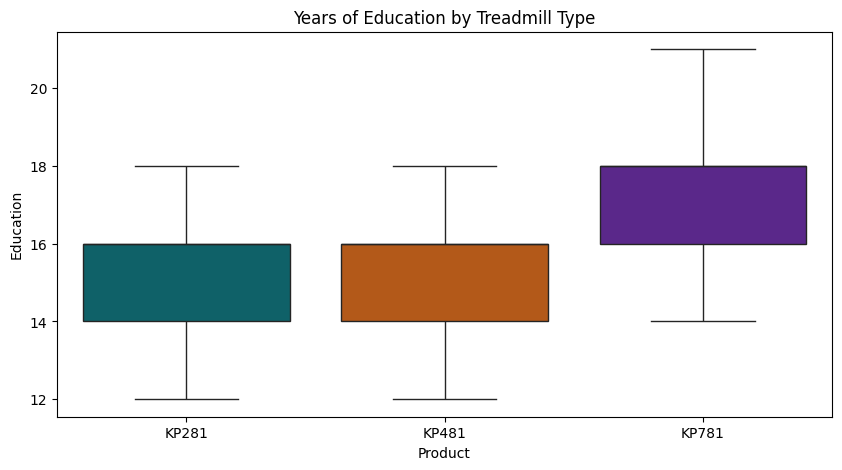

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Product', y='Education', data=df, palette=['#006d77','#cc5500','#5a189a'])
plt.title("Years of Education by Treadmill Type")
plt.show()

* Customers who purchase **KP781 (premium treadmill)** generally have **higher education levels** compared to KP281 and KP481.
* The median education is clearly higher, and the range is shifted upward (14-20 years).

* KP281 and KP481 customers cluster around 14-16 years of education, while KP781 attracts higher-educated buyers.
* KP781 attracts more educated and predominantly male customers.

* **KP281 and KP481** are chosen by customers with **similar education levels** who seems to be college going students.

* **Education plays a role in the choice of premium products** (more educated customers tend to opt for KP781).

In [ ]:
#-- Given education > 16 years, what is the probability of purchasing KP781?

round( pd.crosstab(df['Education'] > 16, df['Product'], normalize='index').loc[True, 'KP781']*100, 2)

np.float64(85.19)

In [ ]:
#-- Given education > 16 years, what is the probability of purchasing KP481?

round( pd.crosstab(df['Education'] > 16, df['Product'], normalize='index').loc[True, 'KP481']*100, 2)

np.float64(7.41)

In [ ]:
#-- Given education > 16 years, what is the probability of purchasing KP281?

round( pd.crosstab(df['Education'] > 16, df['Product'], normalize='index').loc[True, 'KP281']*100, 2)

np.float64(7.41)

* **Strong Preference for KP781** among **Highly Educated Customers**.
* KP281 and KP481 are less popular among highly educated customers.
* Customers with higher education are much more likely to purchase premium/high-end treadmills. This suggests **premium product marketing should target highly educated segments.**
* Education is a major predictor of premium treadmill purchase - highly educated customers overwhelmingly prefer KP781, while KP281 and KP481 are chosen by those with lower education levels.

In [ ]:
#-- If income > $60,000, what is the probability of purchasing KP781?

round(pd.crosstab(df['Income'] > 60000, df['Product'], normalize='index').loc[True, 'KP781']*100, 2)

np.float64(69.05)

* If income > $60,000, the probability of purchasing KP781 is 69.05%.

* This shows a **strong link** between **higher income** and **premium treadmill** purchases.

* Customers with **high income** are much **more inclined to choose KP781** over KP281/KP481.
* Income is a strong driver of KP781 purchases (premium treadmills).

In [ ]:
# -- Are single customers more inclined to buy advanced treadmills compared to partnered customers?

prop_df = (pd.crosstab(df['Product'], df['MaritalStatus'], normalize='index').reset_index().melt(id_vars='Product', var_name='MaritalStatus', value_name='Proportion'))
prop_df

,Product,MaritalStatus,Proportion
0,KP281,Partnered,0.600
1,KP481,Partnered,0.600
2,KP781,Partnered,0.575
3,KP281,Single,0.400
4,KP481,Single,0.400
5,KP781,Single,0.425


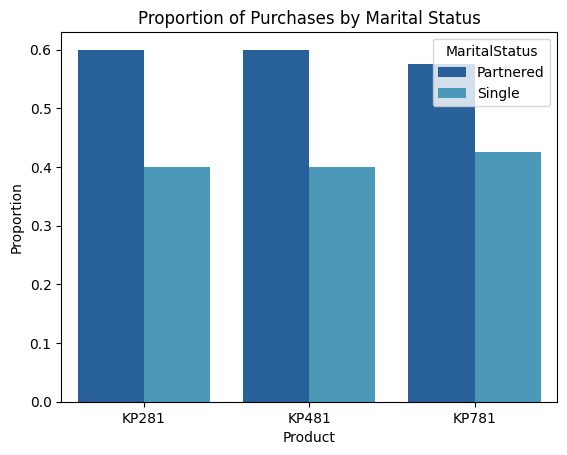

In [ ]:
sns.barplot(data=prop_df, x='Product', y='Proportion', hue='MaritalStatus',palette=['#1561ad','#39a0ca'])
plt.title("Proportion of Purchases by Marital Status")
plt.show()


* **Partnered customers** dominate across all treadmill types.
* Partners customers are slightly more inclined toward premium products compared to basic/mid-range ones.


In [ ]:
#-- If a customer uses the treadmill more than 4 times a week, what is the probability they purchased KP281?

round(pd.crosstab(df['Usage'] > 4, df['Product'], normalize='index').loc[True, 'KP281']*100,2)

np.float64(7.69)

In [ ]:
#-- If a customer uses the treadmill more than 4 times a week, what is the probability they purchased KP481?

round(pd.crosstab(df['Usage'] > 4, df['Product'], normalize='index').loc[True, 'KP481']*100,2)

np.float64(11.54)

In [ ]:
#-- If a customer uses the treadmill more than 4 times a week, what is the probability they purchased KP781?

round(pd.crosstab(df['Usage'] > 4, df['Product'], normalize='index').loc[True, 'KP781']*100,2)

np.float64(80.77)

* **KP781** is the preferred choice for frequent users.
  * Over 80% of customers who use a treadmill more than 4 times a week purchased KP781.

  * This shows that **heavy users invest in premium treadmills** for **durability** and performance.

* **KP281** and **KP481** are less popular among frequent users.

  * Only 7-11% of frequent users chose these models.

  * Likely, these models appeal more to **casual or moderate users.**

* Usage Behavior as a Segmentation Factor.

  * **High-usage customers - KP781** (premium, high-performance).

  * **Low/moderate usage customers - KP281 or KP481** (basic/mid-range, cost-effective).

* Heavy users overwhelmingly prefer KP781, while light/moderate users prefer KP281 or KP481.

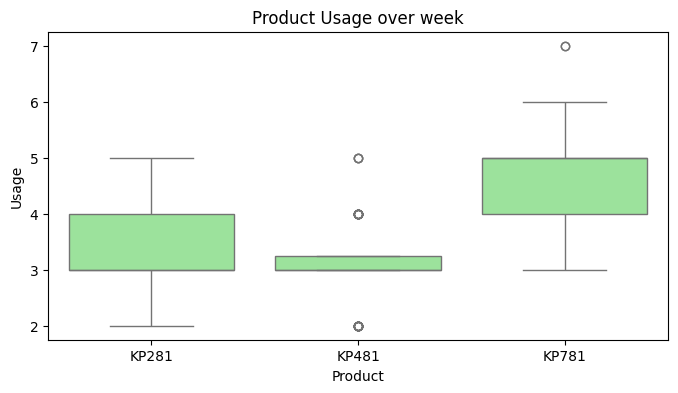

In [ ]:
# -- Do customers buying KP781 use the treadmill more times per week compared to KP281?

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x = 'Product', y='Usage', color ='lightgreen')
plt.title('Product Usage over week')
plt.show()

* Customers buying **KP781** tend to use the treadmill more frequently per week.
* KP281, moderate usage, with most users using it around 3-4 times per week.
* KP481, lowest overall usage of the three products.

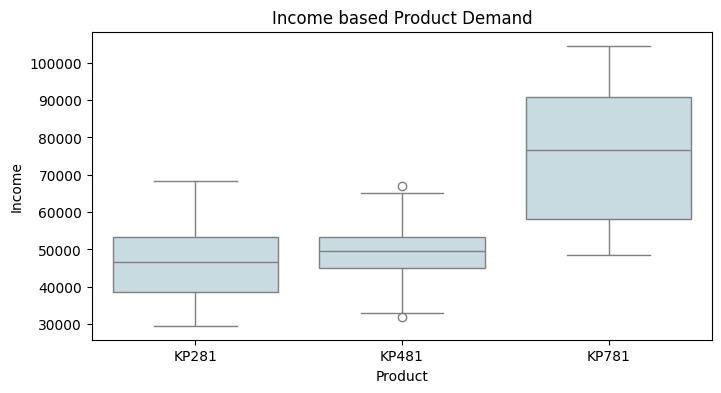

In [ ]:
# -- Is higher annual income associated with purchasing KP781?

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Product', y='Income', color ='#c2dde6')
plt.title('Income based Product Demand')
plt.show()

* People with **higher incomes** tend to go for the **KP781** model. It's clearly the top choice among those earning 70K and above.
* The KP281 model is more common among lower-income customers, especially those earning between 40K and 55K.

* KP481 sits in the middle, attracting buyers with moderate incomes—not too low, not too high.

* There's a clear pattern: as income goes up, so does the likelihood of choosing the more premium KP781.

* The income range for KP781 buyers is the widest, showing it appeals to a variety of high earners.

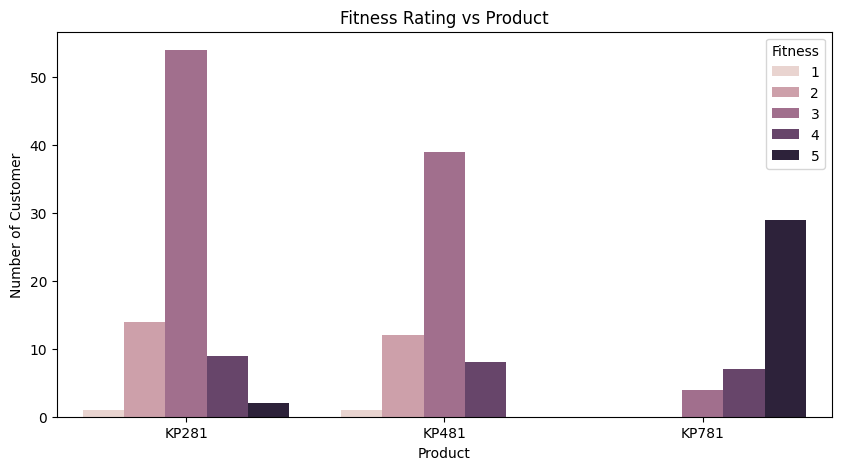

In [ ]:
#-- Do customers with higher fitness ratings prefer KP781 over KP281?

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Product', hue='Fitness')
plt.ylabel('Number of Customer')
plt.title('Fitness Rating vs Product')
plt.show()

* **KP281** is the **beginner's buddy.**
It's the first step into fitness — most of its users are just getting started or cruising at a comfortable pace.

* **KP481** is the **middle ground.**
A solid choice for those who've found their rhythm but aren't pushing extremes. Think weekend joggers and casual gym-goers.


In [ ]:
#-- What is the probability that a customer with fitness level 4 or 5 purchased KP781?

round(pd.crosstab(df['Fitness'].isin([4,5]), df['Product'], normalize='index').loc[True, 'KP781']*100,2)

np.float64(65.45)

In [ ]:
#-- What is the probability that a customer with fitness level 4 or 5 purchased KP481?

round(pd.crosstab(df['Fitness'].isin([4,5]), df['Product'], normalize='index').loc[True, 'KP481']*100,2)

np.float64(14.55)

In [ ]:
#-- What is the probability that a customer with fitness level 4 or 5 purchased KP281?

round(pd.crosstab(df['Fitness'].isin([4,5]), df['Product'], normalize='index').loc[True, 'KP281']*100,2)

np.float64(20.0)

* **KP781** dominates among fit users — over 65% of customers with fitness levels 4 or 5 pick this model.

* **KP481** and **KP281** trail behind, capturing only 14.55% and 20% of the same segment, respectively.

* This strongly supports the idea that KP781 is designed for or appeals to more athletic, fitness-focused users.

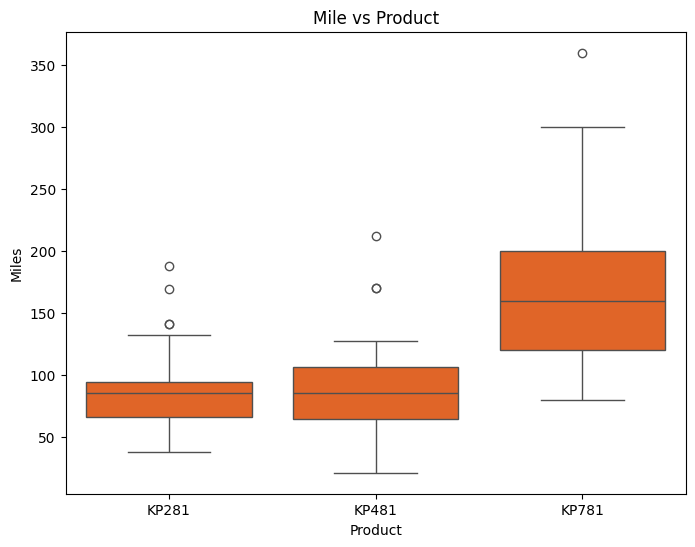

In [ ]:
#-- How many miles per week do customers expect to run for each treadmill category?

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x = 'Product', y='Miles', color ='#FF5A09')
plt.title('Mile vs Product')
plt.show()

* Customers with **KP781** run significantly **more miles** per week than users of KP281 or KP481.

* This suggests KP781 is favored by more active or serious runners.

In [ ]:
#-- What is the probability that a customer expects to run more than 10 miles/week and purchased KP781?

round(pd.crosstab(df['Miles'] > 10, df['Product'], normalize='index').loc[True, 'KP781']*100, 2)

np.float64(22.22)

In [ ]:
#-- What is the probability that a customer expects to run more than 10 miles/week and purchased KP481?

round(pd.crosstab(df['Miles'] > 10, df['Product'], normalize='index').loc[True, 'KP481']*100, 2)

np.float64(33.33)

In [ ]:
#-- What is the probability that a customer expects to run more than 10 miles/week and purchased KP281?

round(pd.crosstab(df['Miles'] > 10, df['Product'], normalize='index').loc[True, 'KP281']*100, 2)

np.float64(44.44)

* While **KP781** users run **more miles** on average (from the boxplot), a **larger proportion of runners** running >10 miles/week actually **choose KP281 or KP481.**

* KP281 and KP481 may be more accessible or popular among casual to semi-serious runners.

* **KP781** might be **targeted** more towards **highly fit** users or those running very high mileage (beyond 10 miles/week), but in smaller proportions.

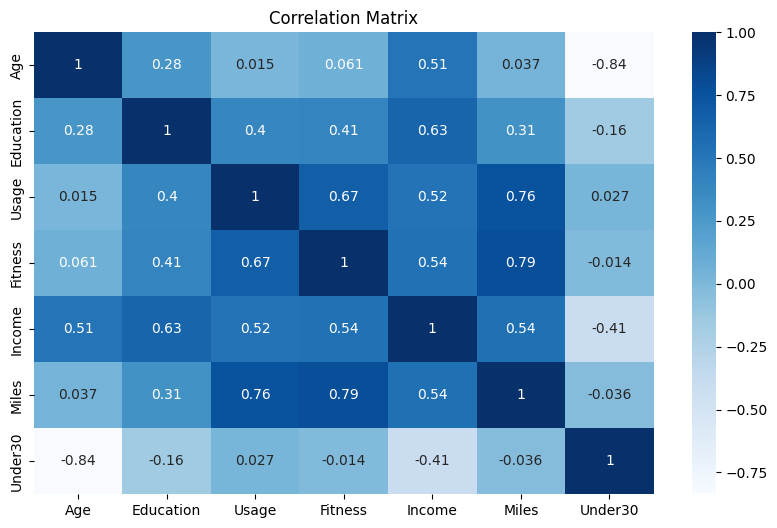

In [ ]:
# -- What is the correlation between income, fitness level, usage frequency, and miles?

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

* **Fitness, usage, and miles** run are **strongly** **interconnected** - fitter users run more and use the products more.

* **Higher income and education levels** tend to go together and are **positively** **linked** with **fitness and product usage.**

* Younger customers (under 30) tend to have lower income and use the product slightly less.

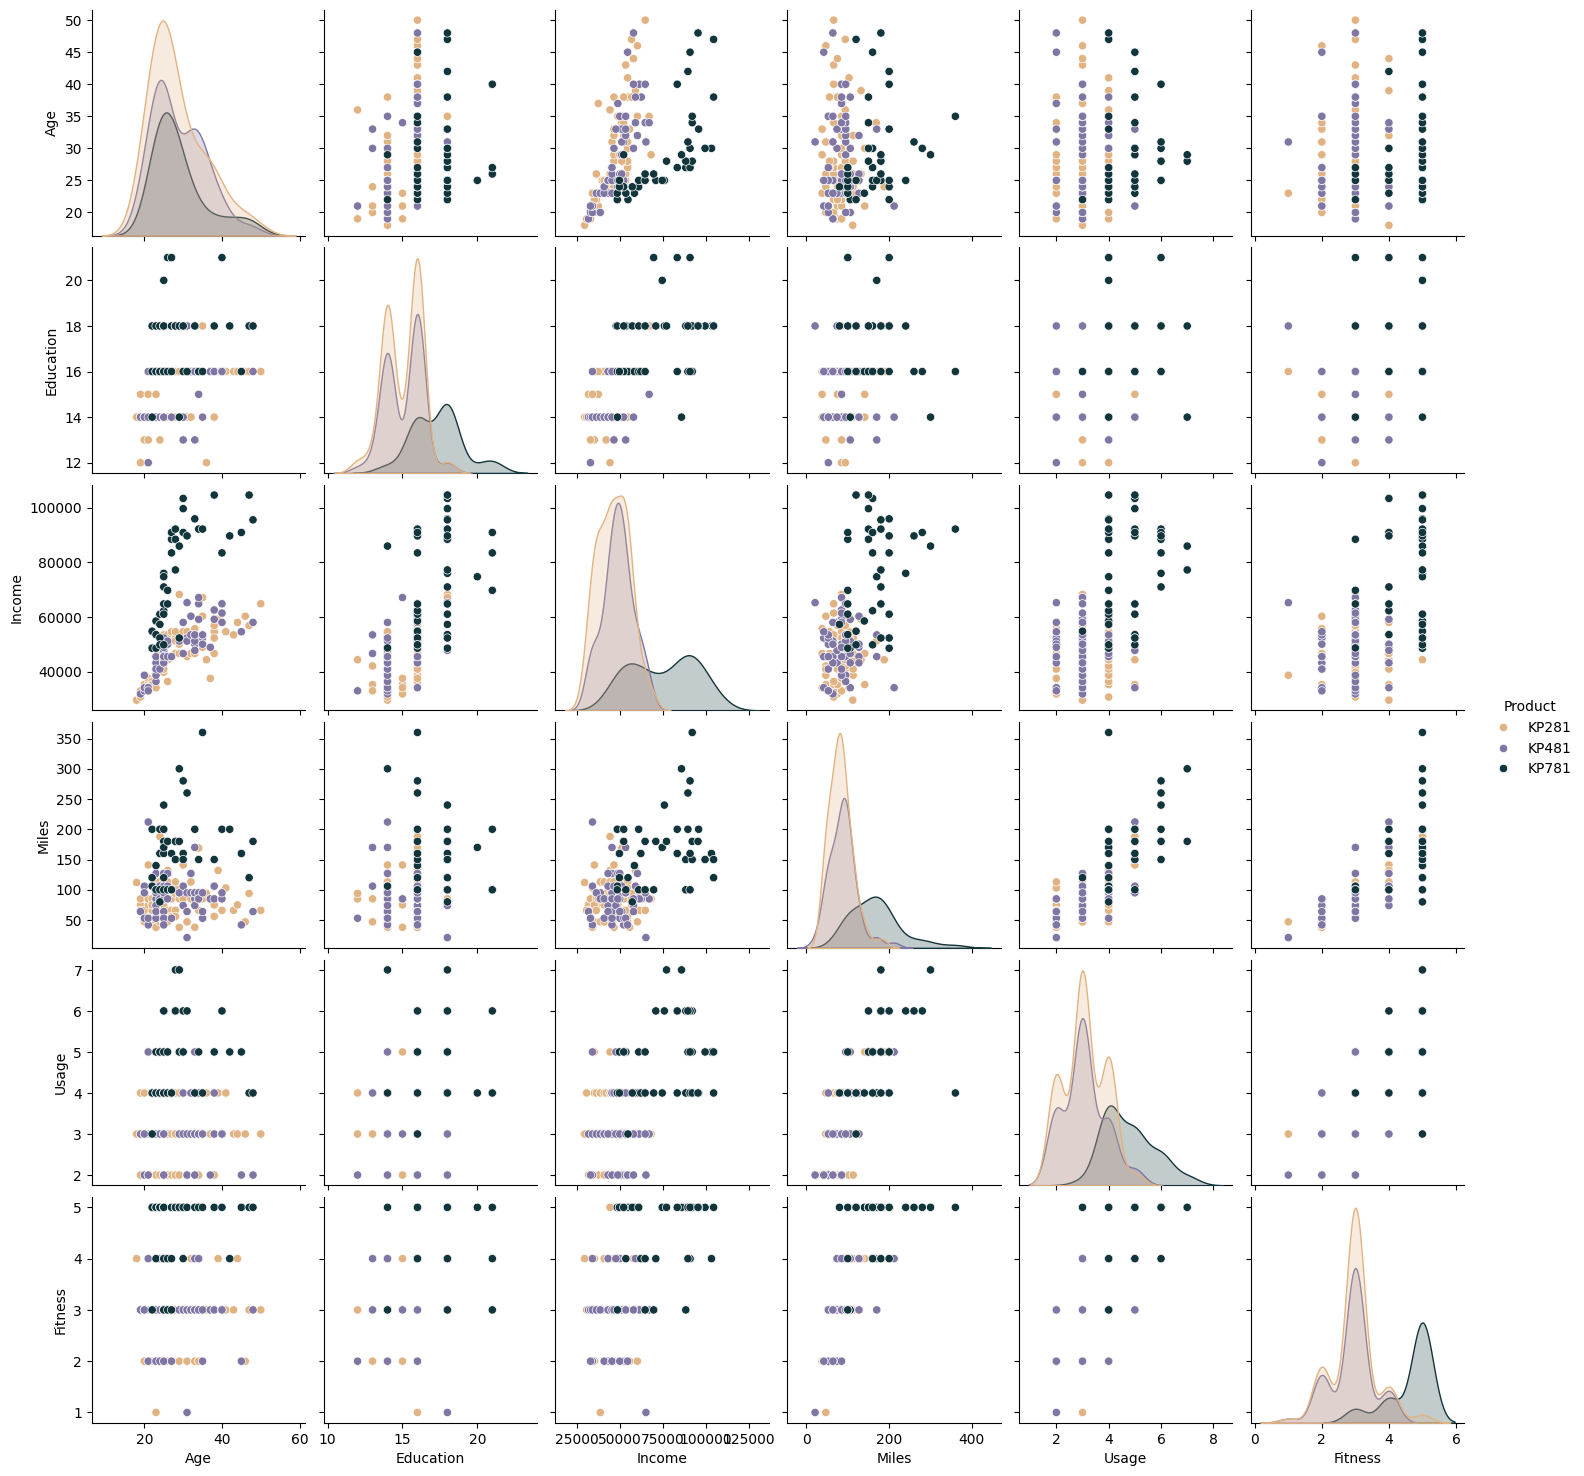

In [ ]:
#-- Which features show the strongest pairwise relationship with treadmill type?

num_cols = ['Age', 'Education', 'Income', 'Miles', 'Usage', 'Fitness', 'Product']

sns.pairplot(df[num_cols], hue='Product', palette=['#e1b382', '#8076a3', '#12343b'])
plt.show()


* **Income and Age:**

  * Customers who purchased KP781 generally have higher incomes and are a bit older compared to those buying KP281 and KP481.

  * KP281 and KP481 buyers show more overlap in income and age, clustering at lower to middle income levels and younger age groups.

* **Miles and Usage:**

  * KP781 customers tend to run more miles weekly and have higher usage frequency.

  * KP281 and KP481 customers show lower miles and usage, with KP481 having a slight edge over KP281 in miles.

* **Fitness Level:**

  * Fitness levels for KP781 buyers skew higher, with many scoring above 4.

  * KP281 and KP481 customers have lower fitness levels concentrated around 2 and 3.

* **Education:**

  * Education levels seem fairly similar across all products, mostly between 12 to 18 years of education.

  * KP781 buyers show a slight trend toward higher education levels but with significant overlap.

* **Relationships Across Variables:**

  * Stronger fitness and usage generally align with higher miles run, especially evident for KP781 buyers.

  * Income tends to increase with age and education, reflecting in the purchasing patterns.

* The KP781 product attracts more affluent, fitter, and higher-mileage customers who use the product more frequently, compared to KP281 and KP481. KP281 and KP481 buyers are younger, less fit, and run fewer miles weekly.

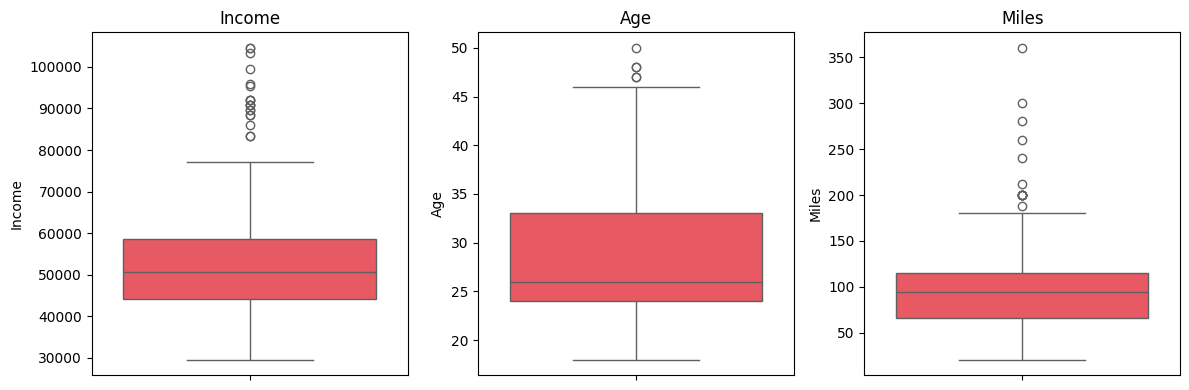

In [ ]:
#-- Are there outliers in income, age, or miles expected per week?

plt.figure(figsize=(12,4))
for i, col in enumerate(['Income','Age','Miles'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="#ff414e")
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

* **Income** and **age** show moderate spreads with some clear outliers.

* Customers generally run between 65 and 120 miles per week, but a few **customers are extreme outliers in mileage**.

* These distributions highlight diversity in the customer base, with a focus on young adults with middle income and varied running habits.

In [ ]:
#-- Do single vs partnered customers with the same income prefer different treadmill models?

df['IncomeGroup'] = pd.qcut(df['Income'], q=4, labels=['Low','Mid-Low','Mid-High','High'])

ct = pd.crosstab([df['IncomeGroup'], df['MaritalStatus']], df['Product'], normalize='index')
ct

Product                       KP281     KP481     KP781
IncomeGroup MaritalStatus                              
Low         Partnered      0.636364  0.363636  0.000000
            Single         0.695652  0.304348  0.000000
Mid-Low     Partnered      0.583333  0.375000  0.041667
            Single         0.285714  0.523810  0.190476
Mid-High    Partnered      0.500000  0.464286  0.035714
            Single         0.529412  0.176471  0.294118
High        Partnered      0.181818  0.181818  0.636364
            Single         0.083333  0.250000  0.666667

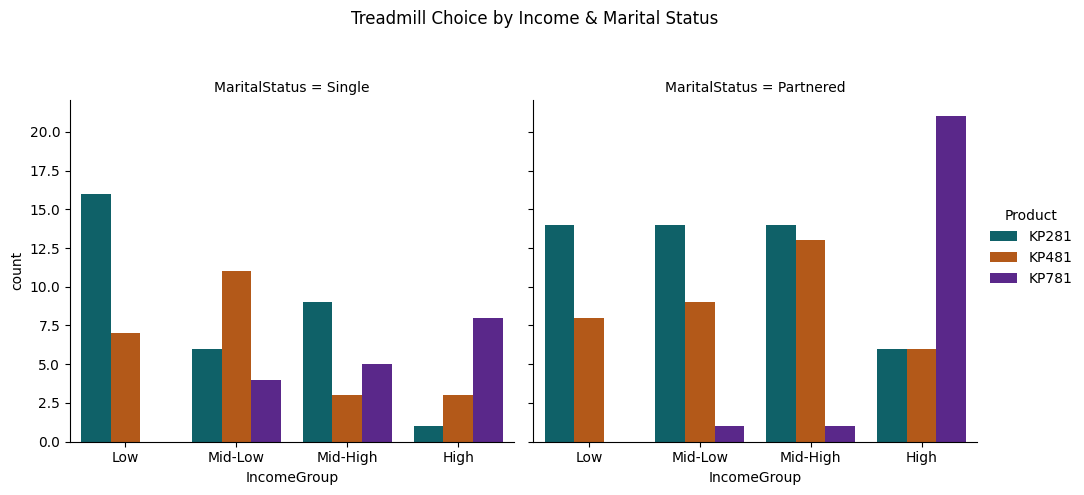

In [ ]:
sns.catplot(data=df, kind="count",x="IncomeGroup", hue="Product", col="MaritalStatus",palette=['#006d77','#cc5500','#5a189a'])
plt.subplots_adjust(top=0.8)
plt.suptitle("Treadmill Choice by Income & Marital Status")

plt.show()

* **KP281** is generally favored by customers with **lower to mid-level incomes**, especially among singles and partnered groups.

* **KP781** is the choice of **high-income customers regardless of marital status,** showing a premium positioning.

* Marital status influences treadmill choice, with **partnered** customers showing **more brand loyalty** to KP281 in mid-income groups.

* **Partnered** with **high income** has choice of **KP781**.

In [ ]:
#-- Do younger vs older customers with similar fitness ratings prefer different products?

df['AgeGroup'] = pd.cut(df['Age'],bins=[0, df['Age'].median(), df['Age'].max()],labels=['Younger','Older'])

ct = pd.crosstab([df['AgeGroup'], df['Fitness']], df['Product'], normalize='index')
ct

Product              KP281     KP481     KP781
AgeGroup Fitness                              
Younger  1        1.000000  0.000000  0.000000
         2        0.500000  0.500000  0.000000
         3        0.551020  0.387755  0.061224
         4        0.357143  0.357143  0.285714
         5        0.076923  0.000000  0.923077
Older    1        0.000000  1.000000  0.000000
         2        0.583333  0.416667  0.000000
         3        0.562500  0.416667  0.020833
         4        0.400000  0.300000  0.300000
         5        0.055556  0.000000  0.944444

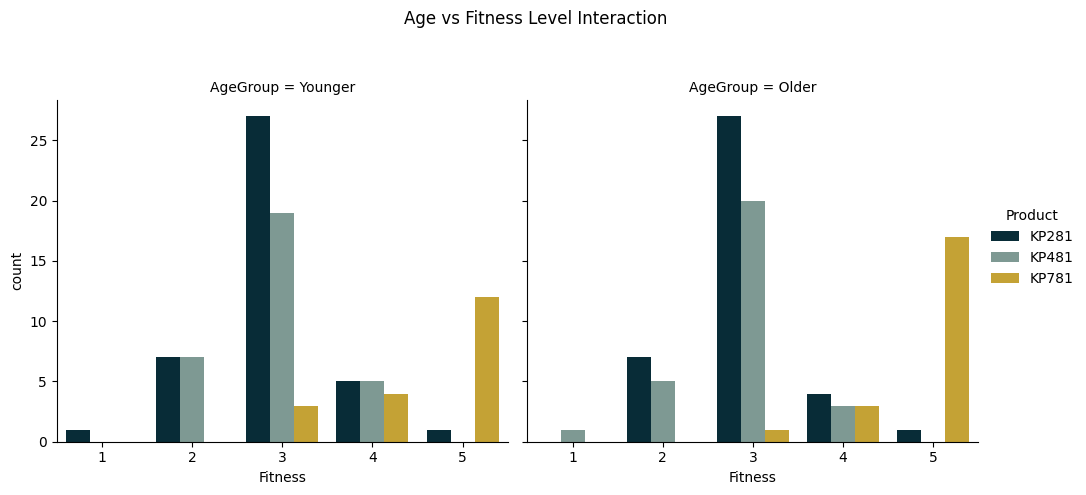

In [ ]:
sns.catplot(data=df, kind="count",x="Fitness", hue="Product", col="AgeGroup",palette=['#00303F','#7A9D96','#DCAE1D'])
plt.subplots_adjust(top=0.8)
plt.suptitle("Age vs Fitness Level Interaction")
plt.show()

* **KP281** and **KP481** are popular among **lower to moderate** fitness levels in both younger and older age groups.

* **KP781** strongly appeals to customers with the **highest fitness level** (5) across all ages.

* Fitness level and age combined influence the product preference, with higher fitness levels skewing towards KP781.

In [ ]:
#-- What is the probability that a customer aged 30–40 with income $40k–$60k purchased KP481?

mask = (df['Age'].between(30, 40)) & (df['Income'].between(40000, 60000))

round(pd.crosstab(mask, df['Product'], normalize='index').loc[True, 'KP481']*100, 2)

np.float64(51.43)

In [ ]:
#-- Is the probability of a female buying KP481 higher than the probability of a male buying KP481?

prob_table = pd.crosstab(df['Gender'], df['Product'], normalize='index')

p_female_kp481 = prob_table.loc['Female', 'KP481']
p_male_kp481   = prob_table.loc['Male', 'KP481']

print("P(KP481 | Female):", round(p_female_kp481*100,2), "%")
print("P(KP481 | Male):", round(p_male_kp481*100,2), "%")
print("Is Female > Male?", p_female_kp481 > p_male_kp481)

P(KP481 | Female): 38.16 %
P(KP481 | Male): 29.81 %
Is Female > Male? True


**Middle-aged** customers (30-40) with mid-range incomes (40k-60k) show a strong preference for **KP481**.

**Females** have a higher likelihood of purchasing **KP481** compared to males.

In [ ]:
#-- What is the probability a randomly chosen customer is younger than 25 years?

from scipy.stats import norm

mu = df['Age'].mean()
sigma = df['Age'].std()

# probability Age < 25
p_under25 = norm.cdf(25, loc=mu, scale=sigma)
print("P(Age < 25) =", round(p_under25*100, 2), "%")

P(Age < 25) = 29.26 %


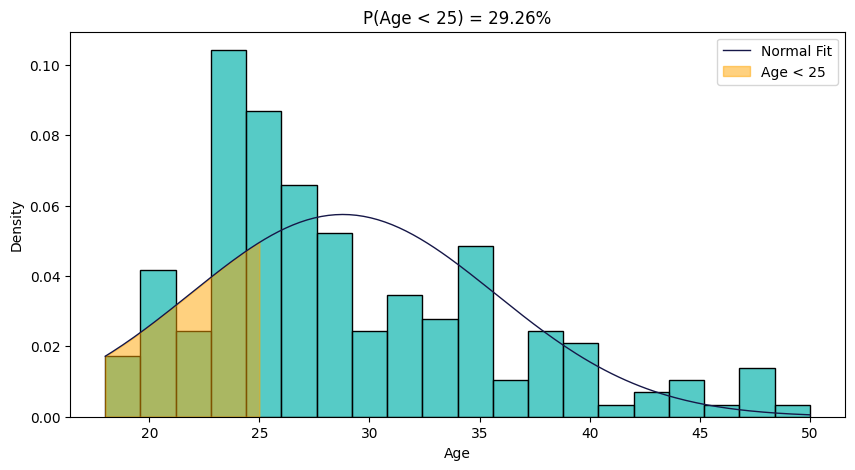

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=False, stat="density", color="#1dbab4", edgecolor="black")
x = np.linspace(df['Age'].min(), df['Age'].max(), 200)
plt.plot(x, norm.pdf(x, mu, sigma), color="#161748", linewidth=1, label="Normal Fit")

x_fill = np.linspace(df['Age'].min(), 25, 200)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), color="orange", alpha=0.5, label="Age < 25")

p_under25 = norm.cdf(25, loc=mu, scale=sigma)
plt.title(f"P(Age < 25) = {p_under25*100:.2f}%")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

* It calculates the probability that a customer is younger than 25 years old, based on the age distribution.
* The age distribution also roughly follows a **normal distribution** but shows some skewness, which suggests that while **many customers fall into the younger bracket, there is also a significant portion in older age groups.** Marketing and product teams might consider segmenting campaigns based on these age clusters to maximize engagement.

In [ ]:
#-- What annual income corresponds to the 90th percentile (top 10%) of customers?

mu = df['Income'].mean()
sigma = df['Income'].std()

# 90th percentile (top 10%)
income_90 = norm.ppf(0.90, loc=mu, scale=sigma)
print("90th percentile income ≈", round(income_90, 2))

90th percentile income ≈ 74873.74


* The 90th percentile of annual income among customers is approximately 74,874. This means that the top 10% of customers earn an income above this value.
* Businesses can focus on these **top earners for higher-value offerings or exclusive services.**

In [ ]:
#-- What is the probability a customer expects to run between 80 and 150 miles/week?

mu = df['Miles'].mean()
sigma = df['Miles'].std()

# probability between 80 and 150
p_80_150 = norm.cdf(150, loc=mu, scale=sigma) - norm.cdf(80, loc=mu, scale=sigma)
print("P(80 ≤ Miles ≤ 150) =", round(p_80_150*100, 2), "%")

P(80 ≤ Miles ≤ 150) = 48.92 %


In [ ]:
#-- What is the 75th percentile for Usage (times/week)?

usage_75_empirical = df['Usage'].quantile(0.75)
print("75th percentile (empirical) =", usage_75_empirical)


75th percentile (empirical) = 4.0


* **Product Design:** Focus on durability and performance for users who run extensively and use the treadmill multiple times per week.

* **Marketing:** Target the segment of customers with moderate to high running distances and usage frequency.

* **Customer Engagement:** Programs that encourage regular usage could improve customer retention since many already use the treadmill frequently.

In [ ]:
#-- What is the probability a customer uses the treadmill more than 4 times/week?

mu = df['Usage'].mean()
sigma = df['Usage'].std()

p_normal = 1 - norm.cdf(4, loc=mu, scale=sigma)
print("Normal approx P(Usage > 4) =", round(p_normal*100, 2), "%")

Normal approx P(Usage > 4) = 30.79 %


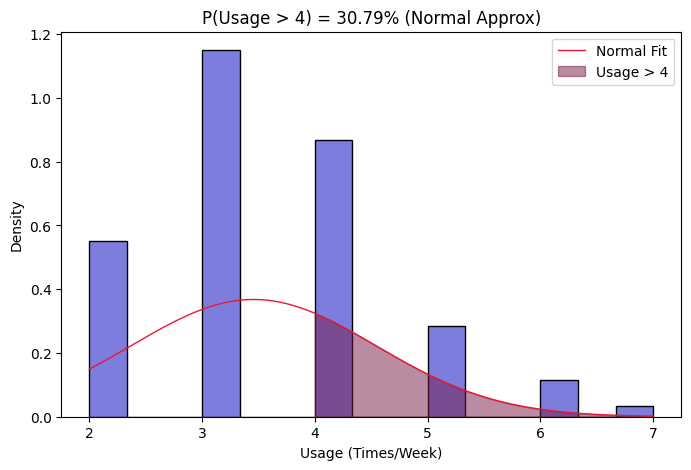

In [ ]:
x = np.linspace(df['Usage'].min(), df['Usage'].max(), 200)

plt.figure(figsize=(8,5))
sns.histplot(df['Usage'], bins=15, stat="density", color="#5252d4", edgecolor="black")

plt.plot(x, norm.pdf(x, mu, sigma), color="#eb1736", linewidth=1, label="Normal Fit")

x_fill = np.linspace(4, df['Usage'].max(), 200)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), color="#781a44", alpha=0.5, label="Usage > 4")

plt.title(f"P(Usage > 4) = {p_normal*100:.2f}% (Normal Approx)")
plt.xlabel("Usage (Times/Week)")
plt.ylabel("Density")
plt.legend()
plt.show()

* **Product Durability:** Design for consistent use, especially since a notable portion uses it heavily (>4 times/week).

* **Marketing Strategy:** Tailor campaigns and features that appeal to frequent users who value durability and advanced features.

* **Customer Support:** Provide maintenance tips and engagement strategies to retain high-usage customers and reduce churn.

### **Recommendation**

* **Develop Premium Models for Heavy Users**
  * Target the 30% of customers who use the treadmill more than 4 times a week with durable, feature-rich models.

* **Introduce Entry-Level Models for Occasional Users**
  * Cater to customers with lower usage by offering budget-friendly, easy-to-use treadmills.

* **Segment Marketing by Usage Frequency**
  * Tailor marketing campaigns differently for light, moderate, and heavy users to improve engagement.

* **Offer Personalized Workout Programs**
  * Use customer data to provide customized training plans based on usage and fitness level.

* **Implement Maintenance and Service Plans**
  * Provide maintenance packages or reminders especially for high-usage customers to prolong treadmill life.

* **Promote Treadmill Features That Boost Motivation**
  * Highlight features like virtual coaching, progress tracking, and challenges to encourage consistent usage.

* **Use Income and Demographic Data for Targeted Advertising**
  * Focus ads on income groups most likely to purchase specific models (e.g., premium for high income).

* **Incentivize High Usage with Rewards or Discounts**
  * Create loyalty programs that reward customers based on treadmill usage frequency.

* **Analyze and Address Usage Barriers for Low Frequency Users**
  * Conduct surveys or interviews to understand why some customers use treadmills less and address those issues.

* **Leverage Data to Predict and Upsell**
  * Use predictive analytics on usage and customer profiles to recommend upgrades or complementary products.